In [5]:
# os.environ['REPO_DIR']='/home/alexn/brainDev/src/'
# os.environ['ROOT_DIR']='/media/alexn/BstemAtlasDataBackup/demo_preprocess/'
# os.environ['DATA_ROOTDIR']='/media/alexn/BstemAtlasDataBackup/demo_preprocess/'
# os.environ['THUMBNAIL_DATA_ROOTDIR']='/media/alexn/BstemAtlasDataBackup/demo_preprocess/'

import os
import sys
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

import matplotlib.pyplot as plt
%matplotlib inline

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.


Setting environment for Precision WorkStation for Alex Newberry
{'MD662': 0.46}
(((((((((((((((((((((((((((((((((((((((((((((((
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_cropbox.ini
True
(((((((((((((((((((((((((((((((((((((((((((((((
(((((((((((((((((((((((((((((((((((((((((((((((
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_cropbox.ini
True
(((((((((((((((((((((((((((((((((((((((((((((((
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/UCSD001/operation_configs/from_none_to_aligned.ini
****************************************************************
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/UCSD001/operation_configs/from_none_to_aligned.ini
****************************************************************
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/UCSD001/operation_configs/from_none_to_aligned.ini
****************************************************************
/media/alexn/BstemAtlasDataBackup/CSHL_data_processe

Seems you are using operation INIs to provide cropbox.
Seems you are using operation INIs to provide cropbox.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache UCSD001 anchor: ini file /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/UCSD001/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/UCSD001/UCSD001_sorted_filenames.txt
Failed to cache UCSD001 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/UCSD001/UCSD001_sorted_filenames.txt
Failed to cache UCSD001 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache UCSD001 section_limits: ini file /media/alexn/BstemAtlasDataBackup/CSHL_data_processed/UCSD001/operation_configs/from_none_to_aligned.ini does not exist.
No anchor.txt is found. 

In [134]:
# Creates input_spec.ini file
def create_input_spec_ini( name, image_name_list, stack, prep_id, version, resol  ):
    f = open(name, "w")
    
    f.write('[DEFAULT]\n')
    f.write('image_name_list = '+image_name_list[0]+'\n')
    for i in range ( 1 , len(image_name_list) ):
        f.write('    '+image_name_list[i]+'\n')
    f.write('stack = '+stack+'\n')
    f.write('prep_id = '+prep_id+'\n')
    f.write('version = '+version+'\n')
    f.write('resol = '+resol+'\n')
    
def create_input_spec_ini_all( name, stack, prep_id, version, resol  ):
    f = open(name, "w")
    
    f.write('[DEFAULT]\n')
    f.write('image_name_list = all\n')
    f.write('stack = '+stack+'\n')
    f.write('prep_id = '+prep_id+'\n')
    f.write('version = '+version+'\n')
    f.write('resol = '+resol+'\n')
    
def get_fn_list_from_sorted_filenames( stack ):
    '''
        get_fn_list_from_sorted_filenames( stack ) returns a list of all the valid
        filenames for the current stack.
    '''
    stack = 'UCSD001'
    fp = os.environ['DATA_ROOTDIR']+'CSHL_data_processed/'+stack+'/'
    fn = stack+'_sorted_filenames.txt'
    
    file0 = open( fp+fn, 'r')
    section_names = []

    for line in file0: 
        if 'Placeholder' in line:
            #print line
            continue
        else:
            space_index = line.index(" ")
            section_name = line[ 0 : space_index ]
            section_number = line[ space_index+1 : ]
            section_names.append( section_name )
    return section_names

In [120]:
fp_base = '/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed\
/UCSD001/UCSD001'
fp_suffix = '_elastix_output'
fp = fp_base + fp_suffix + '/'
files_exist = ! ls $fp

files_sorted = get_fn_list_from_sorted_filenames( stack )

for i in range(0, len(files_exist)):
    files_exist[i] = files_exist[i][0:30]
    
print len(files_exist)
print len(files_sorted)
print len( list(set(files_exist) - set(files_sorted)) ),'Files in one and not the other'

files_to_process = list(set(files_exist) - set(files_sorted))

for file_curr in files_to_process:
    file_to_remove = fp + file_curr + fp_suffix + '.tif'
    if os.path.isfile( file_to_remove ):
        #! rm $file_to_remove
        print file_to_remove
        continue
        
    folder_to_remove = fp + file_curr + fp_suffix + '/'
    print folder_to_remove
    if os.path.isdir( folder_to_remove ):
        #! rm $file_to_remove
        print folder_to_remove

472
458
15 Files in one and not the other
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide080_2018_09_05-S4_elastix_output/
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide090_2018_09_05-S2_elastix_output/
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide090_2018_09_05-S1_elastix_output/
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide062_2018_09_04-S4_elastix_output/
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide003_2018_09_03-S1_elastix_output/
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide077_2018_09_04-S3_elastix_output/
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD

In [1]:
fp = '/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/'
fn = 'MD662_sorted_filenames.txt'
    
file0 = open( fp+fn, 'r')
section_names_MD662 = []

for line in file0: 
    if 'Placeholder' in line:
        #print line
        continue
    else:
        space_index = line.index(" ")
        section_name = line[ 0 : space_index ]
        section_number = line[ space_index+1 : ]
        section_names_MD662.append( section_name )
print section_names_MD662

['MD662&661-F1-2017.06.02-17.07.55_MD662_1_0001', 'MD662&661-F1-2017.06.02-17.07.55_MD662_2_0002', 'MD662&661-F1-2017.06.02-17.07.55_MD662_3_0003', 'MD662&661-F2-2017.06.02-17.21.53_MD662_1_0004', 'MD662&661-F2-2017.06.02-17.21.53_MD662_2_0005', 'MD662&661-F2-2017.06.02-17.21.53_MD662_3_0006', 'MD662&661-F3-2017.06.02-17.43.06_MD662_1_0007', 'MD662&661-F3-2017.06.02-17.43.06_MD662_2_0008', 'MD662&661-F3-2017.06.02-17.43.06_MD662_3_0009', 'MD662&661-F4-2017.06.02-18.04.01_MD662_1_0010', 'MD662&661-F4-2017.06.02-18.04.01_MD662_2_0011', 'MD662&661-F4-2017.06.02-18.04.01_MD662_3_0012', 'MD662&661-F5-2017.06.02-18.25.27_MD662_1_0013', 'MD662&661-F5-2017.06.02-18.25.27_MD662_2_0014', 'MD662&661-F5-2017.06.02-18.25.27_MD662_3_0015', 'MD662&661-F7-2017.06.02-18.46.54_MD662_1_0019', 'MD662&661-F7-2017.06.02-18.46.54_MD662_2_0020', 'MD662&661-F7-2017.06.02-18.46.54_MD662_3_0021', 'MD662&661-F8-2017.06.02-19.08.17_MD662_1_0022', 'MD662&661-F8-2017.06.02-19.08.17_MD662_2_0023', 'MD662&661-F8-2017.

This tutorial walks you through the demo suite.

# Preprocess

# Steps 1-2
### 1) Preprocess Setup
### 2) Global Intensity Normalization


First we download the JP2 raw images

In [62]:
stack = 'UCSD001'
#path = os.environ['DATA_ROOTDIR']+'CSHL_data_processed/'+stack+'/brains_info/'
path = os.path.join(os.environ['DATA_ROOTDIR'],'brains_info/')
! mkdir $path 
name = path+stack+'.ini'

f = open(name, "w")
f.write('[DEFAULT]\n')
f.write('planar_resolution_um = 0.46\n')
f.write('section_thickness_um = 20\n')
f.close()

mkdir: cannot create directory ‘/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/brains_info/’: File exists


In [14]:
# ! download_demo_data_preprocessing.py

download_to = os.environ['DATA_ROOTDIR']

! python download_demo_data_preprocessing.py --demo_data_dir $download_to

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: 'DEMO998'
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
wget -N -P "/media/alexn/BstemAt

Create `DEMO998_input_spec.json`. This specifies where to find each version/resolution of the raw image files.

In [53]:
import json
# Prepare filepaths to putinto the STACK_input_spec.json file
data_dirs = os.path.join( DATA_ROOTDIR, 'jp2_files', 'DEMO998' )
filepath_to_imageName_mapping = os.path.join( DATA_ROOTDIR, 'jp2_files', 'DEMO998', '(.*)?_lossless.jp2' )
imageName_to_filepath_mapping = os.path.join( DATA_ROOTDIR, 'jp2_files', 'DEMO998', '%s_lossless.jp2' )


json_data = ([{"version": None, \
                "resolution": "raw",\
                "data_dirs": data_dirs,\
                "filepath_to_imageName_mapping": filepath_to_imageName_mapping,\
                "imageName_to_filepath_mapping": imageName_to_filepath_mapping }])

# This will likely be changed in the near future so that it is saved in the ROOT_DIR
with open('DEMO998_input_spec.json', 'w') as outfile:
    json.dump(json_data, outfile)
    
print 'DEMO998_input_spec overwritten'


# Example supplied by Yuncong
# Cannot handle variables for some reason, I chose to do the above

# %%writefile DEMO998_input_spec.json
# [
#    {"version": null, 
# "resolution": "raw", 
#     "data_dirs": "/home/yuncong/MouseBrainAtlas/demo/demo_data/jp2_files/DEMO998/", 
#     "filepath_to_imageName_mapping": "/home/yuncong/MouseBrainAtlas/demo/demo_data/jp2_files/DEMO998/(.*)?_lossless.jp2", 
#     "imageName_to_filepath_mapping": "/home/yuncong/MouseBrainAtlas/demo/demo_data/jp2_files/DEMO998/%s_lossless.jp2"
#    }
# ]

DEMO998_input_spec overwritten


Convert all JPEG2000 files to TIF files (16-bit).

In [54]:
! python jp2_to_tiff.py DEMO998 DEMO998_input_spec.json

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: 'DEMO998'
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Found 3 images.

(None, u'raw') 

DEMO998 is a fluorescently stained stack. The texture information is mainly in the Neurotrace-blue stain which is scanned as the blue channel.

We use the `extract_channel.py` script to extract the blue channel of the images. 
- first create a `input_spec.ini` to describe the input where the prep_id/version/resolution are set to `(None,None,raw)`.
- give the resulting __version__ a name "Ntb".

### TO CONTINUE
Make sure you have `STACK_raw/` saved, MUST be named this.

In [105]:
# OG
create_input_spec_ini( name='input_spec.ini', image_name_list=image_name_list, stack='UCSD001', \
           prep_id='None', version='None', resol='raw')

In [106]:
! python extract_channel.py input_spec.ini 2 Ntb

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{}
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 cropbox: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_padded_to_brainstem.ini does not exist.
Failed to cache DEMO998 valid_sections/filenames: DEMO998
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 image_shape: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_padded_to_brainstem.ini does not exist.

RUNNING: 
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw/UCSD001_slide014_

Since raw images (roughly 30,000 by 30,000 pixels) are cumbersome to examine.
We also generate smaller thumbnails by scaling 32 times down. 1/32=0.03125.
- Create `input_spec.ini` as (None,Ntb,raw).
- Call the new __resolution__ "thumbnail".

In [9]:
create_input_spec_ini( name='input_spec.ini', image_name_list=image_name_list, \
                stack='UCSD001', prep_id='None', version='Ntb', resol='raw')

In [10]:
! python rescale.py input_spec.ini thumbnail -f 0.03125

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_none_to_aligned.ini
****************************************************************
Failed to cache DEMO998 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/DEMO998_sorted_filenames.txt
Failed to cache DEMO998 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/DEMO998_sorted_filenames.txt
Failed to cache DEMO998 filenames_to_sections: 
No anchor.txt is found. Seems we a

Rescale: 2.45 seconds.
UCSD001_slide004_2018_09_03-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide004_2018_09_03-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide004_2018_09_03-S3_thumbnail_Ntb.tif
uint16
Rescale: 2.52 seconds.
UCSD001_slide004_2018_09_03-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide004_2018_09_03-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide004_2018_09_03-S4_thumbnail_Ntb.tif
uint16
Rescale: 2.82 seconds.
UCSD001_slide005_2018_09_03-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide005_2018_09_03-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide005_2018_09_03-S1_thumbnail_Ntb.

Rescale: 6.81 seconds.
UCSD001_slide011_2018_09_03-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide011_2018_09_03-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide011_2018_09_03-S2_thumbnail_Ntb.tif
uint16
Rescale: 7.15 seconds.
UCSD001_slide011_2018_09_03-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide011_2018_09_03-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide011_2018_09_03-S3_thumbnail_Ntb.tif
uint16
Rescale: 6.75 seconds.
UCSD001_slide011_2018_09_03-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide011_2018_09_03-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide011_2018_09_03-S4_thumbnail_Ntb.

Rescale: 9.75 seconds.
UCSD001_slide017_2018_09_03-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide017_2018_09_03-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide017_2018_09_03-S4_thumbnail_Ntb.tif
uint16
Rescale: 9.65 seconds.
UCSD001_slide018_2018_09_03-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide018_2018_09_03-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide018_2018_09_03-S1_thumbnail_Ntb.tif
uint16
Rescale: 7.77 seconds.
UCSD001_slide018_2018_09_03-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide018_2018_09_03-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide018_2018_09_03-S2_thumbnail_Ntb.

Rescale: 11.00 seconds.
UCSD001_slide024_2018_09_03-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide024_2018_09_03-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide024_2018_09_03-S3_thumbnail_Ntb.tif
uint16
Rescale: 10.84 seconds.
UCSD001_slide025_2018_09_03-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide025_2018_09_03-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide025_2018_09_03-S1_thumbnail_Ntb.tif
uint16
Rescale: 9.15 seconds.
UCSD001_slide025_2018_09_03-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide025_2018_09_03-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide025_2018_09_03-S2_thumbnail_Nt

Rescale: 11.41 seconds.
UCSD001_slide031_2018_09_03-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide031_2018_09_03-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide031_2018_09_03-S1_thumbnail_Ntb.tif
uint16
Rescale: 12.09 seconds.
UCSD001_slide031_2018_09_03-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide031_2018_09_03-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide031_2018_09_03-S2_thumbnail_Ntb.tif
uint16
Rescale: 12.08 seconds.
UCSD001_slide031_2018_09_03-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide031_2018_09_03-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide031_2018_09_03-S3_thumbnail_N

Rescale: 12.14 seconds.
UCSD001_slide037_2018_09_03-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide037_2018_09_03-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide037_2018_09_03-S2_thumbnail_Ntb.tif
uint16
Rescale: 12.91 seconds.
UCSD001_slide037_2018_09_03-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide037_2018_09_03-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide037_2018_09_03-S3_thumbnail_Ntb.tif
uint16
Rescale: 12.22 seconds.
UCSD001_slide038_2018_09_03-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide038_2018_09_03-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide038_2018_09_03-S1_thumbnail_N

Rescale: 11.07 seconds.
UCSD001_slide044_2018_09_04-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide044_2018_09_04-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide044_2018_09_04-S2_thumbnail_Ntb.tif
uint16
Rescale: 12.51 seconds.
UCSD001_slide044_2018_09_04-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide044_2018_09_04-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide044_2018_09_04-S3_thumbnail_Ntb.tif
uint16
Rescale: 13.92 seconds.
UCSD001_slide044_2018_09_04-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide044_2018_09_04-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide044_2018_09_04-S4_thumbnail_N

Rescale: 11.99 seconds.
UCSD001_slide050_2018_09_04-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide050_2018_09_04-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide050_2018_09_04-S3_thumbnail_Ntb.tif
uint16
Rescale: 14.87 seconds.
UCSD001_slide050_2018_09_04-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide050_2018_09_04-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide050_2018_09_04-S4_thumbnail_Ntb.tif
uint16
Rescale: 14.55 seconds.
UCSD001_slide051_2018_09_04-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide051_2018_09_04-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide051_2018_09_04-S1_thumbnail_N

Rescale: 17.70 seconds.
UCSD001_slide056_2018_09_04-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide056_2018_09_04-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide056_2018_09_04-S4_thumbnail_Ntb.tif
uint16
Rescale: 16.79 seconds.
UCSD001_slide057_2018_09_04-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide057_2018_09_04-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide057_2018_09_04-S1_thumbnail_Ntb.tif
uint16
Rescale: 16.92 seconds.
UCSD001_slide057_2018_09_04-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide057_2018_09_04-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide057_2018_09_04-S2_thumbnail_N

Rescale: 15.35 seconds.
UCSD001_slide063_2018_09_04-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide063_2018_09_04-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide063_2018_09_04-S2_thumbnail_Ntb.tif
uint16
Rescale: 19.40 seconds.
UCSD001_slide063_2018_09_04-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide063_2018_09_04-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide063_2018_09_04-S3_thumbnail_Ntb.tif
uint16
Rescale: 19.16 seconds.
UCSD001_slide063_2018_09_04-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide063_2018_09_04-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide063_2018_09_04-S4_thumbnail_N

Rescale: 17.56 seconds.
UCSD001_slide069_2018_09_04-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide069_2018_09_04-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide069_2018_09_04-S3_thumbnail_Ntb.tif
uint16
Rescale: 17.72 seconds.
UCSD001_slide069_2018_09_04-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide069_2018_09_04-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide069_2018_09_04-S4_thumbnail_Ntb.tif
uint16
Rescale: 16.77 seconds.
UCSD001_slide070_2018_09_04-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide070_2018_09_04-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide070_2018_09_04-S1_thumbnail_N

Rescale: 16.78 seconds.
UCSD001_slide075_2018_09_04-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide075_2018_09_04-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide075_2018_09_04-S3_thumbnail_Ntb.tif
uint16
Rescale: 16.92 seconds.
UCSD001_slide075_2018_09_04-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide075_2018_09_04-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide075_2018_09_04-S4_thumbnail_Ntb.tif
uint16
Rescale: 16.66 seconds.
UCSD001_slide076_2018_09_04-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide076_2018_09_04-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide076_2018_09_04-S1_thumbnail_N

Rescale: 14.77 seconds.
UCSD001_slide081_2018_09_05-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide081_2018_09_05-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide081_2018_09_05-S4_thumbnail_Ntb.tif
uint16
Rescale: 15.10 seconds.
UCSD001_slide082_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide082_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide082_2018_09_05-S1_thumbnail_Ntb.tif
uint16
Rescale: 14.02 seconds.
UCSD001_slide082_2018_09_05-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide082_2018_09_05-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide082_2018_09_05-S2_thumbnail_N

Rescale: 13.27 seconds.
UCSD001_slide088_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide088_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide088_2018_09_05-S1_thumbnail_Ntb.tif
uint16
Rescale: 13.87 seconds.
UCSD001_slide088_2018_09_05-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide088_2018_09_05-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide088_2018_09_05-S2_thumbnail_Ntb.tif
uint16
Rescale: 12.72 seconds.
UCSD001_slide088_2018_09_05-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide088_2018_09_05-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide088_2018_09_05-S3_thumbnail_N

Rescale: 12.10 seconds.
UCSD001_slide094_2018_09_05-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide094_2018_09_05-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide094_2018_09_05-S3_thumbnail_Ntb.tif
uint16
Rescale: 11.60 seconds.
UCSD001_slide094_2018_09_05-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide094_2018_09_05-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide094_2018_09_05-S4_thumbnail_Ntb.tif
uint16
Rescale: 12.91 seconds.
UCSD001_slide095_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide095_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide095_2018_09_05-S1_thumbnail_N

Rescale: 10.36 seconds.
UCSD001_slide101_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide101_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide101_2018_09_05-S1_thumbnail_Ntb.tif
uint16
Rescale: 10.85 seconds.
UCSD001_slide101_2018_09_05-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide101_2018_09_05-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide101_2018_09_05-S2_thumbnail_Ntb.tif
uint16
Rescale: 11.66 seconds.
UCSD001_slide101_2018_09_05-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide101_2018_09_05-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide101_2018_09_05-S3_thumbnail_N

Rescale: 10.23 seconds.
UCSD001_slide108_2018_09_05-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide108_2018_09_05-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide108_2018_09_05-S3_thumbnail_Ntb.tif
uint16
Rescale: 8.90 seconds.
UCSD001_slide109_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide109_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide109_2018_09_05-S1_thumbnail_Ntb.tif
uint16
Rescale: 8.40 seconds.
UCSD001_slide109_2018_09_05-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide109_2018_09_05-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide109_2018_09_05-S2_thumbnail_Ntb

Rescale: 5.23 seconds.
UCSD001_slide115_2018_09_05-S3
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide115_2018_09_05-S3_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide115_2018_09_05-S3_thumbnail_Ntb.tif
uint16
Rescale: 4.93 seconds.
UCSD001_slide116_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide116_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide116_2018_09_05-S1_thumbnail_Ntb.tif
uint16
Rescale: 5.15 seconds.
UCSD001_slide116_2018_09_05-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide116_2018_09_05-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide116_2018_09_05-S2_thumbnail_Ntb.

Rescale: 3.04 seconds.
UCSD001_slide122_2018_09_05-S4
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide122_2018_09_05-S4_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide122_2018_09_05-S4_thumbnail_Ntb.tif
uint16
Rescale: 2.68 seconds.
UCSD001_slide123_2018_09_05-S1
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide123_2018_09_05-S1_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide123_2018_09_05-S1_thumbnail_Ntb.tif
uint16
Rescale: 2.46 seconds.
UCSD001_slide123_2018_09_05-S2
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_raw_Ntb/UCSD001_slide123_2018_09_05-S2_raw_Ntb.tif
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide123_2018_09_05-S2_thumbnail_Ntb.

Let's see an example thumbnail image.

img fp: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide028_2018_09_03-S1_thumbnail_Ntb.tif

img data type: uint16


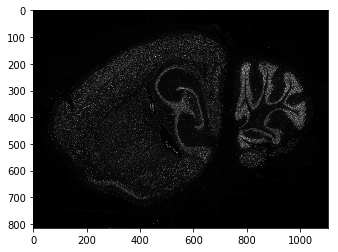

In [11]:
# Visualizing an example Ntb thumbnail image
img_fp = DataManager.get_image_filepath_v2(stack='UCSD001', resol='thumbnail', \
                            prep_id=None, version='Ntb', fn=image_name_list[100])
print 'img fp: '+img_fp+'\n'

img = imread(img_fp)
print 'img data type:',img.dtype

plt.imshow(img, cmap=plt.cm.gray);

The image is very dim because most pixel intensities are concentrated at the bottom part of the 0-2^15 range.
To enhance the contrast, we stretch the histogram so that the entire available intensity range is utilized.
- Create input_spec.ini as (None,Ntb,thumbnail). 
- call the resulting version "NtbNormalized". Note that this is just a global linear histogram stretching - not to be confused with the local adaptive intensity correction that we will do later.

In [12]:
# OG
create_input_spec_ini( name='input_spec.ini', image_name_list=image_name_list, \
        stack='UCSD001', prep_id='None', version='Ntb', resol='thumbnail')

In [13]:
! python normalize_intensity.py input_spec.ini NtbNormalized

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_none_to_aligned.ini
****************************************************************
Failed to cache DEMO998 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/DEMO998_sorted_filenames.txt
Failed to cache DEMO998 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/DEMO998/DEMO998_sorted_filenames.txt
Failed to cache DEMO998 filenames_to_sections: 
No anchor.txt is found. Seems we a

return code: 0
Intensity normalize: 0.04 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide004_2018_09_03-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide004_2018_09_03-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.04 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide005_2018_09_03-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide005_2018_09_03-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.03 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide005_2018_09_03-S2_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide010_2018_09_03-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide010_2018_09_03-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide010_2018_09_03-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide010_2018_09_03-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.05 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide011_2018_09_03-S1_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide016_2018_09_03-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide016_2018_09_03-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide016_2018_09_03-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide016_2018_09_03-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide016_2018_09_03-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide021_2018_09_03-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide021_2018_09_03-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide021_2018_09_03-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide021_2018_09_03-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide021_2018_09_03-S4_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide027_2018_09_03-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide027_2018_09_03-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide027_2018_09_03-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide027_2018_09_03-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide027_2018_09_03-S4_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide032_2018_09_03-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide032_2018_09_03-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide032_2018_09_03-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide032_2018_09_03-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide033_2018_09_03-S1_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.09 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide038_2018_09_03-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide038_2018_09_03-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.09 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide038_2018_09_03-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide038_2018_09_03-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide038_2018_09_03-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.09 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide043_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide043_2018_09_04-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide044_2018_09_04-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide044_2018_09_04-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.09 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide044_2018_09_04-S2_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.14 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide049_2018_09_04-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide049_2018_09_04-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide049_2018_09_04-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide049_2018_09_04-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide049_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide054_2018_09_04-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide054_2018_09_04-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide054_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide054_2018_09_04-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide054_2018_09_04-S4_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.11 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide059_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide059_2018_09_04-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide060_2018_09_04-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide060_2018_09_04-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide060_2018_09_04-S2_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide065_2018_09_04-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide065_2018_09_04-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide065_2018_09_04-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide065_2018_09_04-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide065_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.19 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide070_2018_09_04-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide070_2018_09_04-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.15 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide070_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide070_2018_09_04-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.21 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide070_2018_09_04-S4_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.64 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide075_2018_09_04-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide075_2018_09_04-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.21 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide075_2018_09_04-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide075_2018_09_04-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.11 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide076_2018_09_04-S1_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.09 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide080_2018_09_05-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide080_2018_09_05-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide081_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide081_2018_09_05-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.10 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide081_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide086_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide086_2018_09_05-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide086_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide086_2018_09_05-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide086_2018_09_05-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide091_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide091_2018_09_05-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide091_2018_09_05-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide091_2018_09_05-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide091_2018_09_05-S4_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide097_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide097_2018_09_05-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide097_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide097_2018_09_05-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide097_2018_09_05-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide103_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide103_2018_09_05-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide103_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide103_2018_09_05-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.08 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide103_2018_09_05-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide109_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide109_2018_09_05-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.05 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide109_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide109_2018_09_05-S2_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.07 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide109_2018_09_05-S3_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.05 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide114_2018_09_05-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide114_2018_09_05-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.06 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide115_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide115_2018_09_05-S1_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.12 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide115_2018_09_05-S2_thumbnail_Ntb.tif" -normalize -de

return code: 0
Intensity normalize: 0.04 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide120_2018_09_05-S3_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide120_2018_09_05-S3_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.04 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide120_2018_09_05-S4_thumbnail_Ntb.tif" -normalize -depth 8 "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_NtbNormalized/UCSD001_slide120_2018_09_05-S4_thumbnail_NtbNormalized.tif" 
return code: 0
Intensity normalize: 0.04 seconds.
convert "/media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_thumbnail_Ntb/UCSD001_slide121_2018_09_05-S1_thumbnail_Ntb.tif" -normalize -de

Let's see a resulting image

uint8


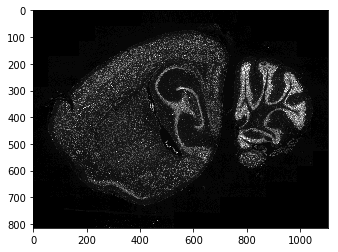

In [14]:
# Visualizing an example NORMALIZED Ntb thumbnail image

img_fp = DataManager.get_image_filepath_v2(stack='UCSD001', resol='thumbnail', \
                        prep_id=None, version='NtbNormalized', fn=image_name_list[100])

img = imread(img_fp)
print img.dtype

plt.imshow(img, cmap=plt.cm.gray);

Now the tissues are much easier to see. Note that the normalized images are now 8-bit.

In [ ]:
# Looking at slices by eye:

file_suffix = '_thumbnail_NtbNormalized.tif'

slices_blurry = ['UCSD001_slide003_2018_09_03-S1','UCSD001_slide071_2018_09_04-S2',
                'UCSD001_slide072_2018_09_04-S1','UCSD001_slide077_2018_09_04-S3',
                'UCSD001_slide080_2018_09_05-S4','UCSD001_slide081_2018_09_05-S1',
                'UCSD001_slide082_2018_09_05-S4','UCSD001_slide090_2018_09_05-S1',
                'UCSD001_slide090_2018_09_05-S2','UCSD001_slide103_2018_09_05-S4',
                'UCSD001_slide111_2018_09_05-S1','UCSD001_slide113_2018_09_05-S1']

slices_background_artifacts = ['UCSD001_slide004_2018_09_03-S1',\
                'UCSD001_slide050_2018_09_04-S2','UCSD001_slide125_2018_09_05-S1']

slices_awful = ['UCSD001_slide062_2018_09_04-S4','UCSD001_slide093_2018_09_05-S3']

slices_missing_chunk = []

# Steps 3-4
### 3) Intra-Stack Alignment
### 4) Create Masks
Skipping a GUI step the should be at the very beginning of step 3: (It doesn't exist though...)

`python preprocess_gui.py`

"Create Masks" step requires running the following GUI twice:

`python src/gui/mask_editing_tool_v4.py DEMO998 NtbNormalized`

In [ ]:
# Example from :/home/yuncong/MouseBrainAtlas/demo/demo_data/operation_configs/from_none_to_aligned.ini
# %%writefile from_none_to_aligned.ini
# [DEFAULT]
# type=warp

# base_prep_id=None
# dest_prep_id=aligned

# # For align
# elastix_parameter_fp=/home/yuncong/MouseBrainAtlas/src/preprocess/parameters/Parameters_Rigid_MutualInfo_noNumberOfSpatialSamples_4000Iters.txt
# elastix_output_dir=demo_data/CSHL_data_processed/DEMO998/DEMO998_elastix_output
# custom_output_dir=demo_data/CSHL_data_processed/DEMO998/DEMO998_custom_output

# # For compose
# anchor_image_name=MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250
# transforms_csv=demo_data/CSHL_data_processed/DEMO998/DEMO998_transforms_to_anchor.csv
# #transforms_csv=demo_data/CSHL_data_processed/DEMO998/DEMO998_transformsTo_MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250.csv
# resolution=thumbnail

In [127]:
os.environ['DATA_ROOTDIR']
stack = 'UCSD001'

In [140]:
DATA_ROOTDIR = os.environ['DATA_ROOTDIR'] # THUMBNAIL_DATA_DIR
stack='UCSD001'

# Creating 'from_none_to_aligned.ini'
# First designate an anchor to use
anchor_fn = 'UCSD001_slide061_2018_09_04-S2'
none_to_aligned_fp = os.path.join(DATA_ROOTDIR, 'CSHL_data_processed', \
                stack, 'operation_configs', 'from_none_to_aligned.ini')
anchor_text_fp = os.path.join(DATA_ROOTDIR, 'CSHL_data_processed', \
                stack, stack+'_anchor.txt')

from_none_to_aligned_content = '[DEFAULT]\n\
type=warp\n\
\n\
base_prep_id=None\n\
dest_prep_id=aligned\n\
\n\
# For align\n\
elastix_parameter_fp='+REPO_DIR+'/preprocess/parameters/Parameters_Rigid_MutualInfo_\
noNumberOfSpatialSamples_4000Iters.txt\n\
elastix_output_dir='+DATA_ROOTDIR+'CSHL_data_processed\
/'+stack+'/'+stack+'_elastix_output\n\
custom_output_dir='+DATA_ROOTDIR+'CSHL_data_processed\
/'+stack+'/'+stack+'_custom_output\n\
\n\
# For compose\n\
anchor_image_name='+anchor_fn+'\n\
transforms_csv='+DATA_ROOTDIR+'CSHL_data_processed/'+stack+'\
/'+stack+'_transforms_to_anchor.csv\n\
#transforms_csv='+DATA_ROOTDIR+'CSHL_data_processed/'+stack+'\
/'+stack+'_transformsTo_'+anchor_fn+'.csv\n\
resolution=thumbnail'

if not os.path.exists(os.path.dirname(none_to_aligned_fp)):
    os.makedirs(os.path.dirname(none_to_aligned_fp))

f = open( none_to_aligned_fp , "w")
f.write( from_none_to_aligned_content ) 
f.close()

f = open( anchor_text_fp , "w")
f.write( anchor_fn ) 
f.close()

#create_input_spec_ini( name='input_spec.ini', image_name_list=image_name_list, \
#        stack='UCSD001', prep_id='None', version='NtbNormalized', resol='thumbnail')

# OG
create_input_spec_ini_all( name='input_spec.ini', \
        stack='UCSD001', prep_id='None', version='NtbNormalized', resol='thumbnail')

In [136]:
! python align_compose.py input_spec.ini --op from_none_to_aligned

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
python align_v3.py input_spec.ini --op from_none_to_aligned
ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No vtk
No mcubes
Failed to cache UCSD001 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_sectionLimits.ini does not exist.
Seems you are using operation INIs to provide cropbox.
Failed to cache UCSD001 valid_sections/filenames: UCSD001
Seems you are using operation INIs to provide cropbox.
{'image_name_list': 'all', 'resol': 'thumbnail', 'version': 'NtbNormalized', 'prep_id': 'None', 'stack': 'UCSD001'}
rm -f /media/alexn/BstemAtlasDataBackup/ucsd_brain/mousebrainatlas_tmp/stderr_*; rm -f /media/alexn/BstemAtlasDat

Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide027_2018_09_03-S2_to_UCSD001_slide028_2018_09_03-S1/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide028_2018_09_03-S2_to_UCSD001_slide027_2018_09_03-S2/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide027_2018_09_03-S3_to_UCSD001_slide028_2018_09_03-S2/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide028_2018_09_03-S3_to_UCSD001_slide027_2018_09_03-S3/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elasti

Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide065_2018_09_04-S1_to_UCSD001_slide064_2018_09_04-S4/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide066_2018_09_04-S1_to_UCSD001_slide065_2018_09_04-S1/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide065_2018_09_04-S2_to_UCSD001_slide066_2018_09_04-S1/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide066_2018_09_04-S2_to_UCSD001_slide065_2018_09_04-S2/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elasti

Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide104_2018_09_05-S2_to_UCSD001_slide103_2018_09_05-S2/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide103_2018_09_05-S3_to_UCSD001_slide104_2018_09_05-S2/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide104_2018_09_05-S3_to_UCSD001_slide103_2018_09_05-S3/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elastix_output/UCSD001_slide104_2018_09_05-S4_to_UCSD001_slide104_2018_09_05-S3/TransformParameters.0.txt
Load elastix-computed transform: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_elasti

2 UCSD001_slide001_2018_09_03-S2 [[ 9.88572958e-01 -1.50743180e-01 -5.48980497e+02]
 [ 1.50743180e-01  9.88572958e-01 -3.71905861e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
3 UCSD001_slide002_2018_09_03-S2 [[ 9.96961334e-01 -7.78980020e-02 -5.63171273e+02]
 [ 7.78980020e-02  9.96961334e-01 -3.28622694e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
4 UCSD001_slide001_2018_09_03-S3 [[ 9.81660983e-01 -1.90635031e-01 -5.22351984e+02]
 [ 1.90635031e-01  9.81660983e-01 -4.63348904e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
5 UCSD001_slide002_2018_09_03-S3 [[ 9.88674485e-01 -1.50075859e-01 -5.19602469e+02]
 [ 1.50075859e-01  9.88674485e-01 -4.04327737e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
6 UCSD001_slide004_2018_09_03-S1 [[ 9.88676286e-01 -1.50063995e-01 -4.75126754e+02]
 [ 1.50063995e-01  9.88676286e-01 -3.90809229e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
7 UCSD001_slide003_2018_09_03-S2 [[ 9.81119296e-01 -1.93403534e-0

57 UCSD001_slide016_2018_09_03-S4 [[ 9.98391512e-01 -5.66955824e-02 -4.11779264e+02]
 [ 5.66955824e-02  9.98391512e-01 -1.49334779e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
58 UCSD001_slide017_2018_09_03-S1 [[ 9.74584629e-01 -2.24019646e-01 -2.67494298e+02]
 [ 2.24019646e-01  9.74584629e-01 -2.89447639e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
59 UCSD001_slide018_2018_09_03-S1 [[ 9.93768707e-01 -1.11461904e-01 -3.66324288e+02]
 [ 1.11461904e-01  9.93768707e-01 -1.99529730e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
60 UCSD001_slide017_2018_09_03-S2 [[ 9.89763961e-01 -1.42714055e-01 -3.00421252e+02]
 [ 1.42714055e-01  9.89763961e-01 -2.32054298e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
61 UCSD001_slide018_2018_09_03-S2 [[ 9.94417688e-01 -1.05515221e-01 -3.20158899e+02]
 [ 1.05515221e-01  9.94417688e-01 -1.59740049e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
62 UCSD001_slide017_2018_09_03-S3 [[ 9.97362803e-01 -7.25771

103 UCSD001_slide029_2018_09_03-S1 [[ 9.96436892e-01 -8.43416842e-02 -2.28545666e+02]
 [ 8.43416842e-02  9.96436892e-01 -1.09904343e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
104 UCSD001_slide030_2018_09_03-S1 [[ 9.91334961e-01 -1.31358272e-01 -1.77056536e+02]
 [ 1.31358272e-01  9.91334961e-01 -1.55681799e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
105 UCSD001_slide029_2018_09_03-S2 [[ 9.93620148e-01 -1.12778549e-01 -2.22748092e+02]
 [ 1.12778549e-01  9.93620148e-01 -1.47990784e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
106 UCSD001_slide030_2018_09_03-S2 [[ 9.92469673e-01 -1.22490606e-01 -1.89140716e+02]
 [ 1.22490606e-01  9.92469673e-01 -1.54818869e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
107 UCSD001_slide029_2018_09_03-S3 [[ 9.99359392e-01 -3.57883559e-02 -2.81230839e+02]
 [ 3.57883559e-02  9.99359392e-01 -6.13393875e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
108 UCSD001_slide030_2018_09_03-S3 [[ 9.94913812e-01 -1

177 UCSD001_slide048_2018_09_04-S4 [[ 9.80505994e-01  1.96489173e-01 -2.54129033e+02]
 [-1.96489173e-01  9.80505994e-01  2.07685849e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
178 UCSD001_slide049_2018_09_04-S1 [[ 9.99982042e-01 -5.99296413e-03 -2.08340614e+02]
 [ 5.99296413e-03  9.99982042e-01 -3.37737933e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
179 UCSD001_slide050_2018_09_04-S1 [[ 9.98496664e-01 -5.48125163e-02 -1.51288553e+02]
 [ 5.48125163e-02  9.98496664e-01 -4.32925071e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
180 UCSD001_slide049_2018_09_04-S2 [[ 9.99997421e-01 -2.27099805e-03 -2.15428592e+02]
 [ 2.27099805e-03  9.99997421e-01  1.58911629e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
181 UCSD001_slide050_2018_09_04-S2 [[ 9.97058081e-01 -7.66497456e-02 -1.62632455e+02]
 [ 7.66497456e-02  9.97058081e-01 -1.17074377e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
182 UCSD001_slide049_2018_09_04-S3 [[ 9.99998067e-01  1

270 UCSD001_slide073_2018_09_04-S1 [[ 9.99190883e-01 -4.02191492e-02 -1.02490415e+02]
 [ 4.02191492e-02  9.99190883e-01 -8.32545737e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
271 UCSD001_slide074_2018_09_04-S1 [[ 9.92337669e-01 -1.23555455e-01 -5.96280671e+01]
 [ 1.23555455e-01  9.92337669e-01 -1.29746368e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
272 UCSD001_slide073_2018_09_04-S2 [[ 9.98162625e-01 -6.05918627e-02 -8.09764680e+01]
 [ 6.05918627e-02  9.98162625e-01 -8.53243324e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
273 UCSD001_slide074_2018_09_04-S2 [[ 9.95641017e-01 -9.32682450e-02 -2.15589754e+01]
 [ 9.32682450e-02  9.95641017e-01 -1.46176217e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
274 UCSD001_slide073_2018_09_04-S3 [[ 9.99000496e-01  4.46991017e-02 -1.70548010e+02]
 [-4.46991017e-02  9.99000496e-01  3.19508253e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
275 UCSD001_slide074_2018_09_04-S3 [[ 9.99749018e-01 -2

396 UCSD001_slide107_2018_09_05-S1 [[ 9.92952879e-01 -1.18509829e-01 -3.20296892e+02]
 [ 1.18509829e-01  9.92952879e-01 -2.43102524e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
397 UCSD001_slide108_2018_09_05-S2 [[ 9.98071173e-01 -6.20800553e-02 -3.44319839e+02]
 [ 6.20800553e-02  9.98071173e-01 -1.77024136e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
398 UCSD001_slide107_2018_09_05-S2 [[ 9.93536647e-01 -1.13511810e-01 -3.18819422e+02]
 [ 1.13511810e-01  9.93536647e-01 -2.68656310e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
399 UCSD001_slide108_2018_09_05-S3 [[ 9.94813296e-01 -1.01717774e-01 -3.11299341e+02]
 [ 1.01717774e-01  9.94813296e-01 -1.71055746e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
400 UCSD001_slide109_2018_09_05-S1 [[ 9.92033114e-01 -1.25977381e-01 -2.72812764e+02]
 [ 1.25977381e-01  9.92033114e-01 -2.23454306e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
401 UCSD001_slide109_2018_09_05-S2 [[ 9.92040041e-01 -1

return code: 0


In [137]:
! python warp_crop.py --input_spec input_spec.ini --op_id from_none_to_padded

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No vtk
No mcubes
Failed to cache UCSD001 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/UCSD001/UCSD001_prep2_sectionLimits.ini does not exist.
Seems you are using operation INIs to provide cropbox.
Failed to cache UCSD001 valid_sections/filenames: UCSD001
Seems you are using operation INIs to provide cropbox.
rm -f /media/alexn/BstemAtlasDataBackup/ucsd_brain/mousebrainatlas_tmp/stderr_*; rm -f /media/alexn/BstemAtlasDataBackup/ucsd_brain/mousebrainatlas_tmp/stdout_*
return code: 0
Run locally.
Jobs submitted. Use wait_qsub_complete() to wait for all execution to finish.
rm -f /media/alexn/BstemAtlasDataBackup/ucsd_brain/mousebrainatlas_tmp/stderr_*; rm -f /media/alexn/BstemAtlasDataBackup/ucsd_brain/mousebrainatlas_tmp/stdout_*
return code: 0
Run locally.
Jobs submit

In [141]:
# python src/gui/preprocess_tool_v3.py UCSD001 --tb_version NtbNormalized
! python ../src/gui/preprocess_tool_v3.py UCSD001 --tb_version NtbNormalized

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'UCSD001': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD585 anchor: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/operation_configs/from_none_to_aligned.ini does not exist.
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_sorted_filenames.txt
Failed to cache MD585 sections_to_filenames: 
File does not exist: /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_processed/MD585/MD585_sorted_filenames.txt
Failed to cache MD585 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Failed to cache MD585 section_limits: ini file /media/alexn/BstemAtlasDataBackup/ucsd_brain/CSHL_data_process

prep1_thumbnail_NtbNormalized.tf files have been generated for all of the files.

At this point, you should use preprocess_gui.py to double check all slices have been aligned properly.

Now we move on to the mask generation step. It starts with running the mask_editing_tool_v4.py GUI for drawing the initial snake contours.

In [55]:
%%writefile input_spec.ini
[DEFAULT]
image_name_list = MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242
    MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250
    MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257
stack = DEMO998
prep_id = alignedPadded
version = NtbNormalized
resol = thumbnail

Overwriting input_spec.ini


In [56]:
! python masking.py input_spec.ini \
/media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep1_thumbnail_initSnakeContours.pkl

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: DEMO998
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
ENABLE_DOWNLOAD_S3 is False. Skip 

Morphsnake iter 29 Component sizes: [561430]
Morphsnake iter 31 Component sizes: [553831]
Morphsnake iter 30 Component sizes: [559162]
Morphsnake iter 30 Component sizes: [558647]
Morphsnake iter 32 Component sizes: [551009]
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 31 Component sizes: [555862, 1, 1]
Morphsnake iter 31 Component sizes: [556491]
Morphsnake iter 33 Component sizes: [548187]
Morphsnake iter 32 Component sizes: [553093]
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Component area is too small - nullified.
Morphsnake iter 32 Component sizes: [553716, 2, 18, 1, 2]
Component area is too small - nullified.
Morphsnake iter 34 Component sizes: [545371, 3]
Morphsnake iter 33 Component sizes: [550324]
Morphsnake iter 33 Component sizes: [551037]
Morphsnake iter 35 Component sizes: [542565]
Component area is too small - nullified.
Component area is to

Morphsnake iter 71 Component sizes: [453670]
Morphsnake iter 76 Component sizes: [443776]
Morphsnake iter 75 Component sizes: [443614]
Morphsnake iter 72 Component sizes: [451530]
Morphsnake iter 77 Component sizes: [441825]
Morphsnake iter 76 Component sizes: [441609]
Morphsnake iter 73 Component sizes: [449454]
Morphsnake iter 78 Component sizes: [439795]
Morphsnake iter 77 Component sizes: [439757]
Morphsnake iter 74 Component sizes: [447353]
Morphsnake iter 79 Component sizes: [437890]
Morphsnake iter 78 Component sizes: [437793]
Morphsnake iter 75 Component sizes: [445364]
Morphsnake iter 80 Component sizes: [435934]
Morphsnake iter 79 Component sizes: [435989]
Component area is too small - nullified.
Morphsnake iter 76 Component sizes: [443335, 1]
Morphsnake iter 81 Component sizes: [434124]
Morphsnake iter 80 Component sizes: [434061]
Morphsnake iter 82 Component sizes: [432234]
Morphsnake iter 77 Component sizes: [441416]
Component area is too small - nullified.
Morphsnake iter

Morphsnake iter 134 Component sizes: [366221]
Morphsnake iter 126 Component sizes: [373785]
Morphsnake iter 130 Component sizes: [369834]
Morphsnake iter 135 Component sizes: [365441]
Morphsnake iter 127 Component sizes: [372928]
Morphsnake iter 131 Component sizes: [369044]
Morphsnake iter 136 Component sizes: [364421]
Morphsnake iter 128 Component sizes: [371846]
Morphsnake iter 132 Component sizes: [368002]
Morphsnake iter 137 Component sizes: [363650]
Morphsnake iter 129 Component sizes: [371013]
Morphsnake iter 133 Component sizes: [367233]
Morphsnake iter 138 Component sizes: [362632]
Morphsnake iter 130 Component sizes: [369945]
Morphsnake iter 134 Component sizes: [366219]
Morphsnake iter 139 Component sizes: [361876]
Morphsnake iter 131 Component sizes: [369126]
Morphsnake iter 135 Component sizes: [365470]
Component area is too small - nullified.
Morphsnake iter 140 Component sizes: [360869, 2]
Morphsnake iter 132 Component sizes: [368067]
Morphsnake iter 136 Component sizes:

Morphsnake iter 192 Component sizes: [328411]
Morphsnake iter 184 Component sizes: [332358]
Morphsnake iter 179 Component sizes: [332262]
Morphsnake iter 193 Component sizes: [328205]
Morphsnake iter 185 Component sizes: [332120]
Morphsnake iter 180 Component sizes: [331623]
Morphsnake iter 194 Component sizes: [327700]
Morphsnake iter 186 Component sizes: [331608]
Morphsnake iter 181 Component sizes: [331285]
Component area is too small - nullified.
Morphsnake iter 195 Component sizes: [327467, 41]
Morphsnake iter 182 Component sizes: [330668]
Morphsnake iter 187 Component sizes: [331392]
Morphsnake iter 196 Component sizes: [326980]
Morphsnake iter 188 Component sizes: [330886]
Morphsnake iter 183 Component sizes: [330360]
Morphsnake iter 197 Component sizes: [326804]
Morphsnake iter 189 Component sizes: [330688]
Component area is too small - nullified.
Morphsnake iter 184 Component sizes: [329757, 3]
Component area is too small - nullified.
Morphsnake iter 198 Component sizes: [3263

Morphsnake iter 239 Component sizes: [322202]
Morphsnake iter 252 Component sizes: [317092]
Morphsnake iter 234 Component sizes: [318380]
Morphsnake iter 253 Component sizes: [317269]
Morphsnake iter 240 Component sizes: [321976]
Morphsnake iter 235 Component sizes: [318484]
Morphsnake iter 254 Component sizes: [317034]
Morphsnake iter 241 Component sizes: [322118]
Morphsnake iter 236 Component sizes: [318193]
Morphsnake iter 255 Component sizes: [317217]
Morphsnake iter 242 Component sizes: [321901]
Morphsnake iter 237 Component sizes: [318300]
Morphsnake iter 256 Component sizes: [316988]
Morphsnake iter 243 Component sizes: [322052]
Morphsnake iter 238 Component sizes: [318010]
Morphsnake iter 257 Component sizes: [317181]
Morphsnake iter 244 Component sizes: [321845]
Morphsnake iter 239 Component sizes: [318117]
Morphsnake iter 258 Component sizes: [316960]
Morphsnake iter 245 Component sizes: [322012]
Component area is too small - nullified.
Morphsnake iter 240 Component sizes: [3

***
Run GUI to double check auto-mask generation
***

In [57]:
# SLICE,X_left,Y_top,X_right,Y_bottom
%%writefile DEMO998_original_image_crop.csv
MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242,77,86,1175,524
MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250,77,86,1175,524
MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257,77,86,1175,524

Writing DEMO998_original_image_crop.csv


In [58]:
%%writefile input_spec.ini
[DEFAULT]
image_name_list = MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242
    MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250
    MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257
stack = DEMO998
prep_id = alignedPadded
version = mask
resol = thumbnail

Overwriting input_spec.ini


In [83]:
! python warp_crop.py --input_spec input_spec.ini --op_id from_padded_to_none

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: DEMO998
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
FILEPATH : /media/alexn/BstemAtlas

# Steps 5-6
### 5) Local Adaptive Intensity Normalization
### 6) Whole-slice crop

In [84]:
%%writefile input_spec.ini
[DEFAULT]
image_name_list = MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242
    MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250
    MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257
stack = DEMO998
prep_id = None
version = Ntb
resol = raw

Overwriting input_spec.ini


In [85]:
! python normalize_intensity_adaptive.py input_spec.ini NtbNormalizedAdaptiveInvertedGamma

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: DEMO998
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
/home/alexn/brainDev/mousebrainatl

In [86]:
#%%writefile from_none_to_wholeslice.ini
#[DEFAULT]
#operation_sequence = from_none_to_aligned
#    from_aligned_to_wholeslice

In [87]:
%%writefile input_spec.ini
[DEFAULT]
image_name_list = MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242
    MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250
    MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257
stack = DEMO998
prep_id = None
version = NtbNormalizedAdaptiveInvertedGamma
resol = raw

Overwriting input_spec.ini


In [96]:
os.path.join( DATA_ROOTDIR, 'operation_configs', 'from_none_to_wholeslice.ini') 

'/media/alexn/BstemAtlasDataBackup/demo_preprocess/operation_configs/from_none_to_wholeslice.ini'

In [97]:
! python warp_crop.py --input_spec input_spec.ini --op_id \
/media/alexn/BstemAtlasDataBackup/demo_preprocess/operation_configs/from_none_to_wholeslice

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: DEMO998
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
FILEPATH : /media/alexn/BstemAtlas

In [98]:
%%writefile input_spec.ini
[DEFAULT]
image_name_list = MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242
    MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250
    MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257
stack = DEMO998
prep_id = alignedWithMargin
version = NtbNormalizedAdaptiveInvertedGamma
resol = raw

Overwriting input_spec.ini


In [99]:
! python rescale.py input_spec.ini thumbnail -f 0.03125

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: DEMO998
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
/home/alexn/brainDev/mousebrainatl

# Steps 7-8
### 7) Brainstem crop
### 8) (Optional) Obtain a simple global alignment

In [108]:
%%writefile input_spec.ini
[DEFAULT]
image_name_list = MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242
    MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250
    MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257
stack = DEMO998
prep_id = alignedWithMargin
version = NtbNormalizedAdaptiveInvertedGamma
resol = raw

Overwriting input_spec.ini


In [107]:
! python warp_crop.py --input_spec input_spec.ini --op_id \
/media/alexn/BstemAtlasDataBackup/demo_preprocess/operation_configs/from_wholeslice_to_brainstem

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: DEMO998
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Traceback (most recent call last):

In [104]:
%%writefile input_spec.ini
[DEFAULT]
image_name_list = MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242
    MD662&661-F84-2017.06.06-14.03.51_MD661_1_0250
    MD662&661-F86-2017.06.06-14.56.48_MD661_2_0257
stack = DEMO998
prep_id = alignedBrainstemCrop
version = NtbNormalizedAdaptiveInvertedGamma
resol = raw

Overwriting input_spec.ini


In [105]:
! python rescale.py input_spec.ini thumbnail -f 0.03125

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: DEMO998
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
/home/alexn/brainDev/mousebrainatl

In [106]:
! python compress_jpeg.py input_spec.ini

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'DEMO998': 0.46}
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
No vtk
No mcubes
Failed to cache DEMO998 section_limits: ini file /media/alexn/BstemAtlasDataBackup/demo_preprocess/CSHL_data_processed/DEMO998/DEMO998_prep2_sectionLimits.ini does not exist.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
Failed to cache DEMO998 valid_sections/filenames: DEMO998
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
convert "/media/alexn/BstemAtlasDa

Necessary Info For Each Brain

- Mouse Name
- Stain / Virus
    * Std
- Gender
- Age
- Experiment Type
- Cutting Plane
    * Std

Necessary Info For Each Slice

- Slice number
- Scan Date

## UCSD

20180129-04_slide001_2018_09_03-S1.tif

* 20180129-04
    - "Mouse Name"
    - Day of Death - Brain of the day (4th brain)
    - Unique mouse indentifier
* slide001
    - The slide being scanned. Has 4 slices each, S1, S2,...
* 2018_09_03
    - Scan Date
* S1
    - The slice on the slide. 4 slices per slide. S1 is first slice.
    
To add?
* Full brain, or partial brain
* Stain type / Channel
* Sagittal / Coronal/ Horozontal

## CSHL

MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242

* MD662&661
    - Stack Name, 2 numbers indicate 2 brains processed together
* F81
    - 
* 2017.06.06
    - Stain Date
* 12.44.40
    - Scan Date
* MD661
    - The specific 
* 2
    - 
* 0242

In [3]:
! echo $DATA_ROOTDIR

/media/alexn/BstemAtlasDataBackup/


In [10]:
create_input_spec_ini( name='input_spec.ini', image_name_list=section_names_MD662, stack='MD662', \
           prep_id='5', version='NtbNormalizedAdaptiveInvertedGamma', resol='raw')

In [11]:
! python compress_jpeg.py input_spec.ini

ENABLE_UPLOAD_S3 is not set, default to False.
ENABLE_DOWNLOAD_S3 is not set, default to False.
Setting environment for Precision WorkStation for Alex Newberry
{'MD662': 0.46}
No vtk
No mcubes
(((((((((((((((((((((((((((((((((((((((((((((((
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_cropbox.ini
True
(((((((((((((((((((((((((((((((((((((((((((((((
Seems you are using operation INIs to provide cropbox.
(((((((((((((((((((((((((((((((((((((((((((((((
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_cropbox.ini
True
(((((((((((((((((((((((((((((((((((((((((((((((
Seems you are using operation INIs to provide cropbox.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/UCSD001/operation_configs/from_none_to_aligned.ini
****************************************************************
Failed to cache UCSD001 anchor: ini file /media/alexn/BstemAtl

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F2-2017.06.02-17.21.53_MD662_3_0006_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F2-2017.06.02-17.21.53_MD662_3_0006_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F3-2017.06.02-17.43.06_MD662_1_0007_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F3-2017.06.02-17.43.06_MD662

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F5-2017.06.02-18.25.27_MD662_2_0014_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F5-2017.06.02-18.25.27_MD662_2_0014_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F5-2017.06.02-18.25.27_MD662_3_0015_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F5-2017.06.02-18.25.27_MD662

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F9-2017.06.02-19.29.31_MD662_3_0027_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F9-2017.06.02-19.29.31_MD662_3_0027_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F10-2017.06.02-19.50.53_MD662_1_0028_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F10-2017.06.02-19.50.53_MD6

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F12-2017.06.02-20.33.07_MD662_2_0035_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F12-2017.06.02-20.33.07_MD662_2_0035_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F12-2017.06.02-20.33.07_MD662_3_0036_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F12-2017.06.02-20.33.07_M

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F15-2017.06.02-21.15.53_MD662_3_0045_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F15-2017.06.02-21.15.53_MD662_3_0045_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F16-2017.06.02-21.43.54_MD662_1_0046_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F16-2017.06.02-21.43.54_M

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F18-2017.06.02-22.34.01_MD662_2_0053_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F18-2017.06.02-22.34.01_MD662_2_0053_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F18-2017.06.02-22.34.01_MD662_3_0054_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F18-2017.06.02-22.34.01_M

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F21-2017.06.08-16.21.02_MD662_3_0063_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F21-2017.06.08-16.21.02_MD662_3_0063_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F22-2017.06.08-16.46.06_MD662_1_0064_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F22-2017.06.08-16.46.06_M

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F24-2017.06.05-12.23.11_MD662_2_0071_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F24-2017.06.05-12.23.11_MD662_2_0071_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F24-2017.06.05-12.23.11_MD662_3_0072_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F24-2017.06.05-12.23.11_M

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F27-2017.06.05-13.37.58_MD662_2_0080_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F27-2017.06.05-13.37.58_MD662_2_0080_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F27-2017.06.05-13.37.58_MD662_3_0081_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F27-2017.06.05-13.37.58_M

return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F30-2017.06.05-14.49.48_MD662_3_0090_prep5_raw_NtbNormalizedAdaptiveI

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F33-2017.06.05-16.09.53_MD662_2_0098_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F33-2017.06.05-16.09.53_MD662_2_0098_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F33-2017.06.05-16.09.53_MD662_3_0099_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F33-2017.06.05-16.09.53_M

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F37-2017.06.05-18.09.08_MD662_2_0110_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F37-2017.06.05-18.09.08_MD662_2_0110_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F37-2017.06.05-18.09.08_MD662_3_0111_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F37-2017.06.05-18.09.08_MD662_3_0111_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F43-2017.06.05-21.05.21_MD662_1_0127_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F43-2017.06.05-21.05.21_MD662_1_0127_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F43-2017.06.05-21.05.21_MD662_2_0128_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F43-2017.06.05-21.05.21_MD662_2_0128_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F48-2017.06.05-23.36.49_MD662_3_0144_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F48-2017.06.05-23.36.49_MD662_3_0144_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F49-2017.06.06-00.05.38_MD662_1_0145_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F49-2017.06.06-00.05.38_MD662_1_0145_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F54-2017.06.22-17.00.44_MD662_2_0161_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F54-2017.06.22-17.00.44_MD662_2_0161_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F54-2017.06.22-17.00.44_MD662_3_0162_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F54-2017.06.22-17.00.44_MD662_3_0162_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F60-2017.06.06-03.35.37_MD662_1_0178_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F60-2017.06.06-03.35.37_MD662_1_0178_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F60-2017.06.06-03.35.37_MD662_2_0179_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F60-2017.06.06-03.35.37_MD662_2_0179_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F65-2017.06.06-06.05.08_MD662_3_0195_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F65-2017.06.06-06.05.08_MD662_3_0195_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F66-2017.06.06-06.35.52_MD662_1_0196_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F66-2017.06.06-06.35.52_MD662_1_0196_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F72-2017.06.06-09.26.44_MD662_2_0215_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F72-2017.06.06-09.26.44_MD662_2_0215_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F73-2017.06.06-09.53.20_MD662_1_0217_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F73-2017.06.06-09.53.20_MD662_1_0217_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F82-2017.06.06-13.10.59_MD662_1_0244_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F82-2017.06.06-13.10.59_MD662_1_0244_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F82-2017.06.06-13.10.59_MD662_2_0245_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F82-2017.06.06-13.10.59_MD662_2_0245_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F90-2017.06.06-17.16.08_MD662_2_0269_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F90-2017.06.06-17.16.08_MD662_2_0269_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F91-2017.06.06-17.42.59_MD662_1_0271_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F91-2017.06.06-17.42.59_MD662_1_0271_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F99-2017.06.06-21.14.03_MD662_1_0295_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F99-2017.06.06-21.14.03_MD662_1_0295_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F99-2017.06.06-21.14.03_MD662_2_0296_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F99-2017.06.06-21.14.03_MD662_2_0296_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F107-2017.06.07-00.44.42_MD662_2_0320_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F107-2017.06.07-00.44.42_MD662_2_0320_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F108-2017.06.07-01.10.56_MD662_1_0322_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F108-2017.06.07-01.10.56_MD662_1_0322_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/a

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F116-2017.06.07-04.39.41_MD662_1_0346_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F116-2017.06.07-04.39.41_MD662_1_0346_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F116-2017.06.07-04.39.41_MD662_2_0347_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F116-2017.06.07-04.39.41_MD662_2_0347_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/a

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F124-2017.06.07-16.26.31_MD662_2_0371_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F124-2017.06.07-16.26.31_MD662_2_0371_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F126-2017.06.07-17.13.02_MD662_1_0376_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F126-2017.06.07-17.13.02_MD662_1_0376_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/a

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F131-2017.06.07-19.36.32_MD662_1_0391_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F131-2017.06.07-19.36.32_MD662_1_0391_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F131-2017.06.07-19.36.32_MD662_2_0392_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F131-2017.06.07-19.36.32_MD662_2_0392_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/a

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F136-2017.06.07-22.02.11_MD662_3_0408_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F136-2017.06.07-22.02.11_MD662_3_0408_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F137-2017.06.07-22.31.13_MD662_1_0409_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F137-2017.06.07-22.31.13_MD662_1_0409_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/a

return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F142-2017.06.08-19.12.20_MD662_2_0425_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F142-2017.06.08-19.12.20_MD662_2_0425_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F142-2017.06.08-19.12.20_MD662_3_0426_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F142-2017.06.08-19.12.20_MD662_3_0426_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg"
return code: 0
convert "/media/a

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F147-2017.06.08-02.33.03_MD662_3_0441_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F147-2017.06.08-02.33.03_MD662_3_0441_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F148-2017.06.08-02.58.49_MD662_1_0442_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F148-2017.06.08-02.58.

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F151-2017.06.08-03.49.47_MD662_1_0451_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F151-2017.06.08-03.49.47_MD662_1_0451_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F151-2017.06.08-03.49.47_MD662_2_0452_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F151-2017.06.08-03.49.

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F154-2017.06.08-04.58.31_MD662_2_0461_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F154-2017.06.08-04.58.31_MD662_2_0461_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F154-2017.06.08-04.58.31_MD662_3_0462_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F154-2017.06.08-04.58.

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F157-2017.06.08-06.01.11_MD662_2_0470_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F157-2017.06.08-06.01.11_MD662_2_0470_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F157-2017.06.08-06.01.11_MD662_3_0471_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F157-2017.06.08-06.01.

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F160-2017.06.08-06.22.55_MD662_3_0480_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F160-2017.06.08-06.22.55_MD662_3_0480_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F161-2017.06.08-11.23.08_MD662_1_0481_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F161-2017.06.08-11.23.

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F164-2017.06.08-06.56.25_MD662_1_0490_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F164-2017.06.08-06.56.25_MD662_1_0490_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F164-2017.06.08-06.56.25_MD662_2_0491_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F164-2017.06.08-06.56.

convert: unable to open image `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F167-2017.06.08-07.26.12_MD662_2_0500_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif': No such file or directory @ error/blob.c/OpenBlob/2712.
convert: no images defined `/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F167-2017.06.08-07.26.12_MD662_2_0500_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg.jpg' @ error/convert.c/ConvertImageCommand/3210.
return code: 1
convert "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F167-2017.06.08-07.26.12_MD662_3_0501_prep5_raw_NtbNormalizedAdaptiveInvertedGamma.tif" -depth 8 -format jpg -quality 80 "/media/alexn/BstemAtlasDataBackup/CSHL_data_processed/MD662/MD662_prep5_raw_NtbNormalizedAdaptiveInvertedGammaJpeg/MD662&661-F167-2017.06.08-07.26.

In [ ]:
python src/gui/brain_labeling_gui_v28.py MD662 --prep 5 --img_version 'NtbNormalizedAdaptiveInvertedGammaJpeg'